In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [12]:
# Load the data
df = pd.read_excel(r"C:\Users\owner\Downloads\Onyx Data -DataDNA Dataset Challenge - Merchandise Sales Dataset - January 2025 (1)\Onyx Data -DataDNA Dataset Challenge - Merchandise Sales Dataset - January 2025.xlsx", sheet_name='Data')


In [13]:
# Display the first few rows of the dataset
print(df.head())

   Order ID Order Date Product ID Product Category Buyer Gender  Buyer Age  \
0    189440 2024-07-21     BF1543         Clothing         Male         30   
1    187385 2024-07-20     BF1543         Clothing         Male         32   
2    181844 2024-07-21     BF1544            Other       Female         26   
3    197934 2024-08-19     BF1544            Other         Male         28   
4    122470 2024-01-06     BF1545            Other       Female         19   

  Order Location   Latitude   Longitude International Shipping  Sales Price  \
0     New Jersey  39.833851  -74.871826                     No          100   
1      Las Vegas  36.188110 -115.176468                     No          100   
2        Cardiff  51.481583   -3.179090                    Yes            9   
3     Pittsburgh  40.440620  -79.995890                     No            9   
4          Miami  25.761681  -80.191788                     No           10   

   Shipping Charges  Sales per Unit  Quantity  Total Sal

In [14]:
# Check for missing values
print(df.isnull().sum())

# Check data types
print(df.dtypes)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Extract year and month from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Check for duplicates
print(df.duplicated().sum())

Order ID                  0
Order Date                0
Product ID                0
Product Category          0
Buyer Gender              0
Buyer Age                 0
Order Location            0
Latitude                  0
Longitude                 0
International Shipping    0
Sales Price               0
Shipping Charges          0
Sales per Unit            0
Quantity                  0
Total Sales               0
Rating                    0
Review                    0
dtype: int64
Order ID                           int64
Order Date                datetime64[ns]
Product ID                        object
Product Category                  object
Buyer Gender                      object
Buyer Age                          int64
Order Location                    object
Latitude                         float64
Longitude                        float64
International Shipping            object
Sales Price                        int64
Shipping Charges                   int64
Sales per Unit     

In [15]:
# Basic statistics for numerical columns
print(df.describe())

# Basic statistics for categorical columns
print(df.describe(include=['O']))

            Order ID                     Order Date    Buyer Age     Latitude  \
count    7394.000000                           7394  7394.000000  7394.000000   
mean   159735.134028  2024-05-02 16:09:05.307005696    26.455504    37.988751   
min    120005.000000            2023-11-05 00:00:00    18.000000   -33.865143   
25%    139895.750000            2024-02-02 00:00:00    22.000000    35.117500   
50%    159577.500000            2024-04-30 00:00:00    26.000000    39.833851   
75%    179869.750000            2024-07-31 00:00:00    31.000000    45.508888   
max    199994.000000            2024-11-04 00:00:00    35.000000    55.860916   
std     23040.247194                            NaN     5.208202    14.211051   

         Longitude  Sales Price  Shipping Charges  Sales per Unit  \
count  7394.000000  7394.000000       7394.000000     7394.000000   
mean    -63.504667    55.165404         14.633487       69.798891   
min    -122.676210     9.000000          0.000000        9.0000

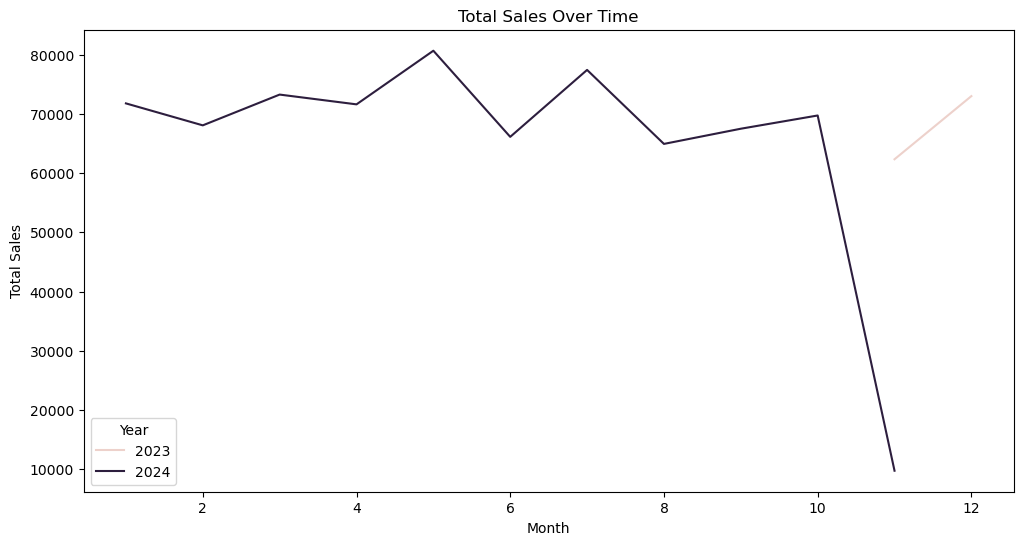

In [16]:
# Total sales over time
total_sales_over_time = df.groupby(['Year', 'Month'])['Total Sales'].sum().reset_index()

# Plotting total sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=total_sales_over_time, x='Month', y='Total Sales', hue='Year')
plt.title('Total Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

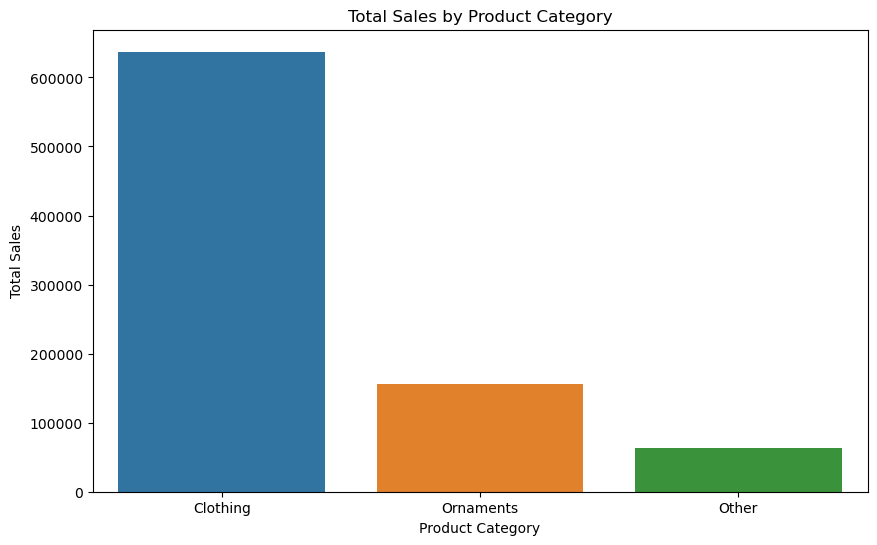

In [17]:
# Sales by product category
sales_by_category = df.groupby('Product Category')['Total Sales'].sum().reset_index()

# Plotting sales by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_category, x='Product Category', y='Total Sales')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

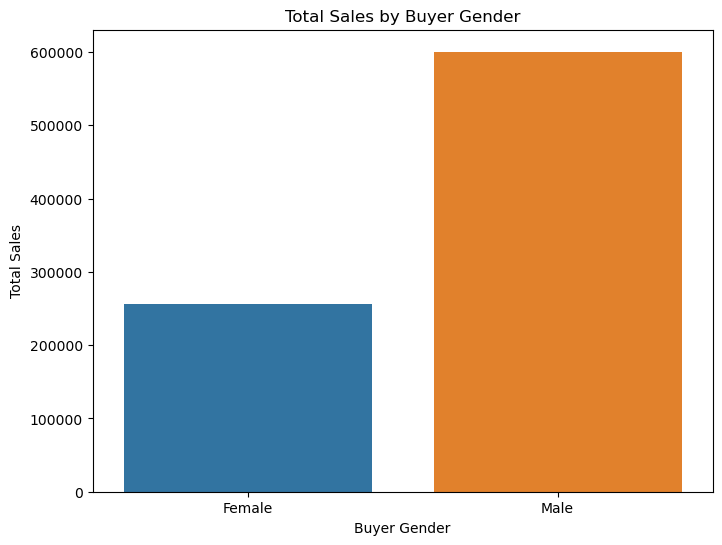

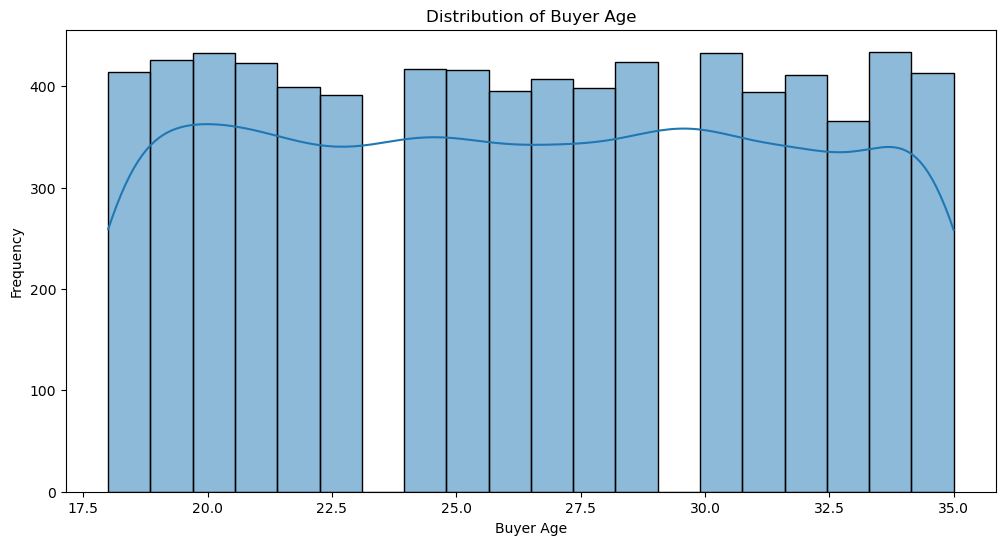

In [18]:
# Sales by buyer gender
sales_by_gender = df.groupby('Buyer Gender')['Total Sales'].sum().reset_index()

# Plotting sales by buyer gender
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_gender, x='Buyer Gender', y='Total Sales')
plt.title('Total Sales by Buyer Gender')
plt.xlabel('Buyer Gender')
plt.ylabel('Total Sales')
plt.show()

# Sales by buyer age
plt.figure(figsize=(12, 6))
sns.histplot(df['Buyer Age'], bins=20, kde=True)
plt.title('Distribution of Buyer Age')
plt.xlabel('Buyer Age')
plt.ylabel('Frequency')
plt.show()

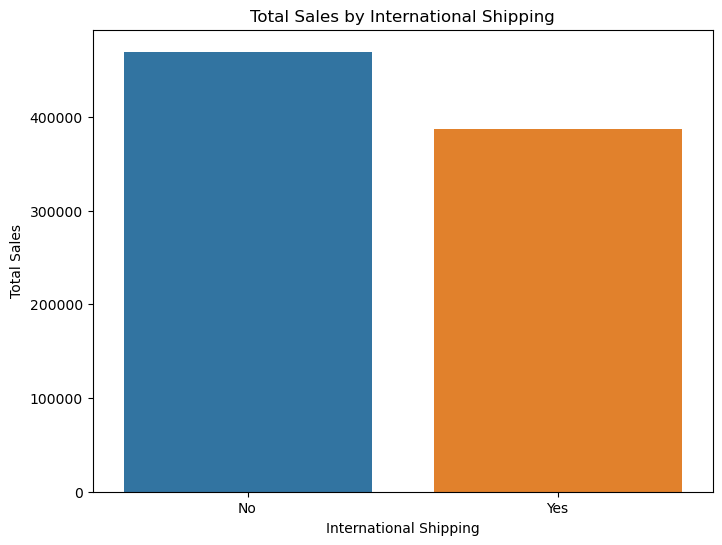

In [20]:
# Sales by international shipping
sales_by_shipping = df.groupby('International Shipping')['Total Sales'].sum().reset_index()

# Plotting sales by international shipping
plt.figure(figsize=(8, 6))
sns.barplot(data=sales_by_shipping, x='International Shipping', y='Total Sales')
plt.title('Total Sales by International Shipping')
plt.xlabel('International Shipping')
plt.ylabel('Total Sales')
plt.show()

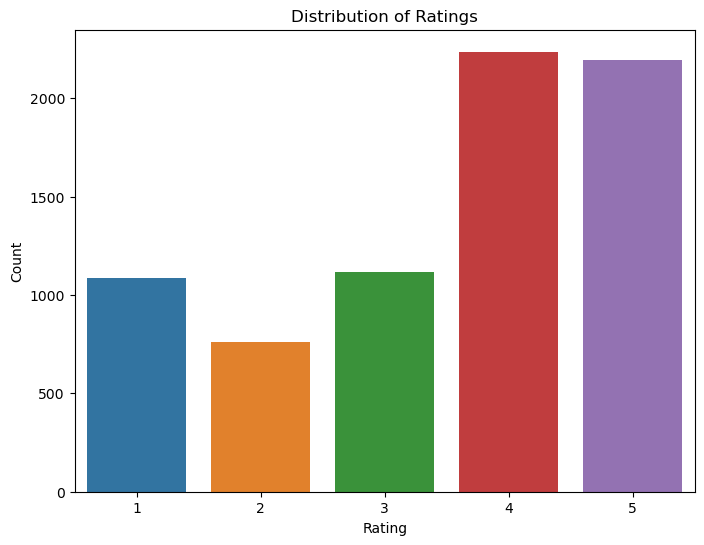

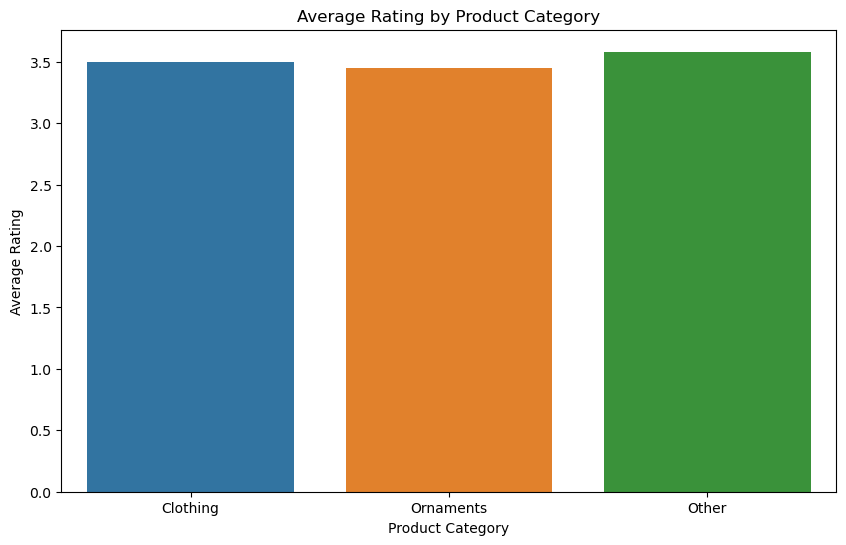

In [21]:
# Distribution of ratings
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Rating')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Average rating by product category
avg_rating_by_category = df.groupby('Product Category')['Rating'].mean().reset_index()

# Plotting average rating by product category
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_rating_by_category, x='Product Category', y='Rating')
plt.title('Average Rating by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Average Rating')
plt.show()

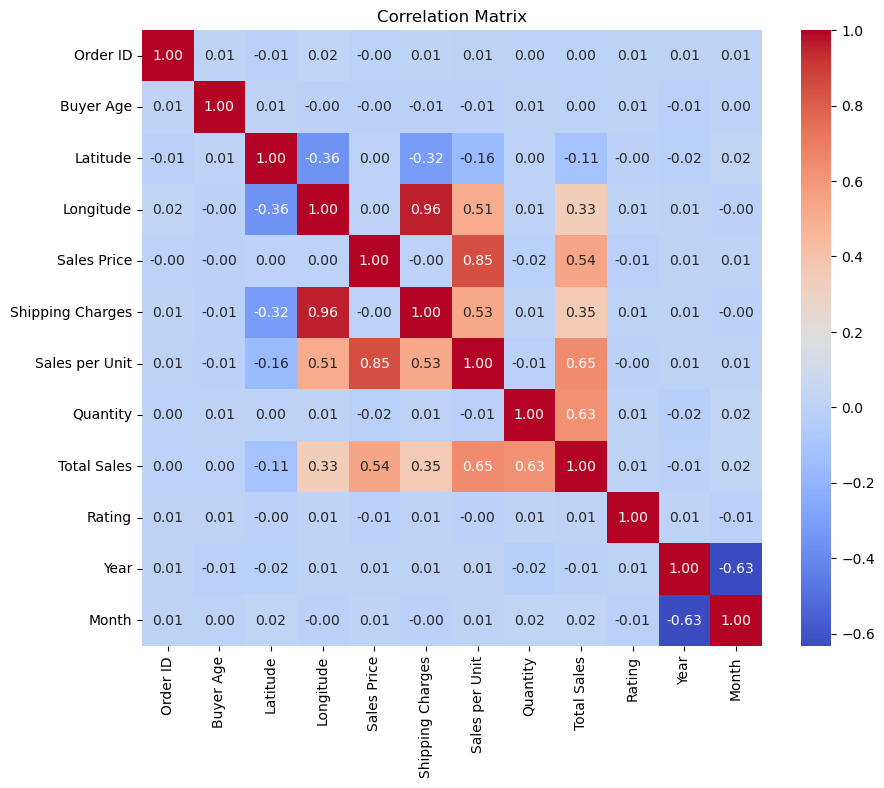

In [23]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

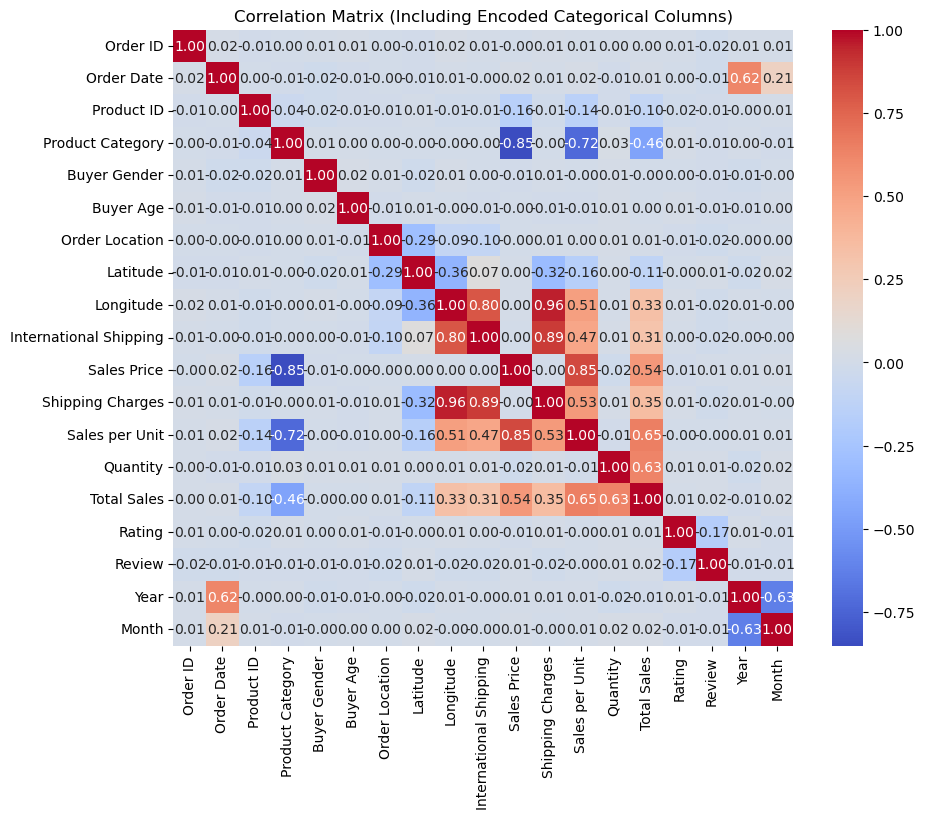

In [24]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Now calculate the correlation matrix
corr_matrix = df.corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Including Encoded Categorical Columns)')
plt.show()

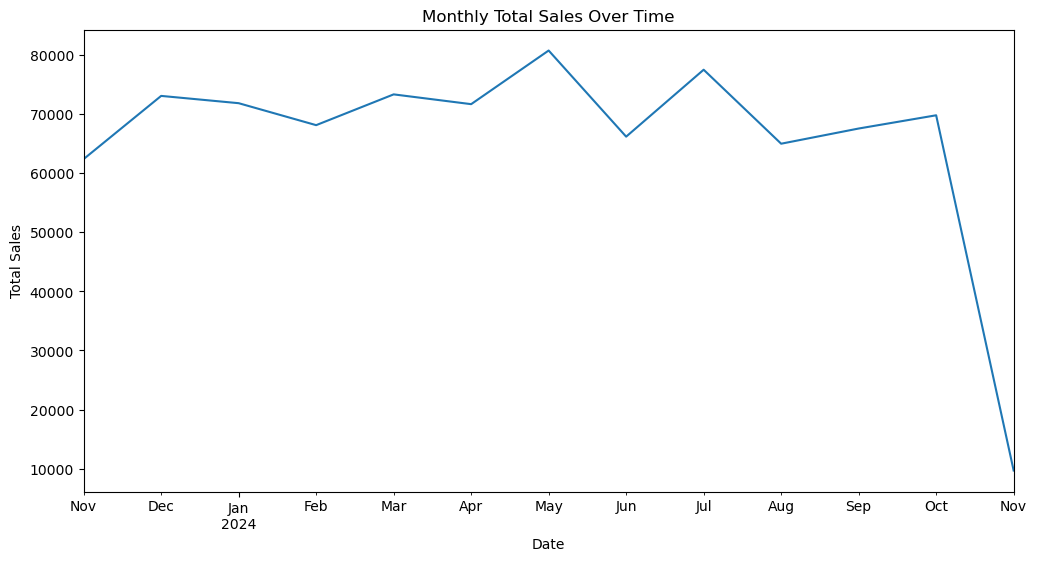

In [25]:
# Time series analysis of sales
df.set_index('Order Date', inplace=True)
df.resample('M')['Total Sales'].sum().plot(figsize=(12, 6))
plt.title('Monthly Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
# Load the data
df = pd.read_excel('Onyx Data -DataDNA Dataset Challenge - Merchandise Sales Dataset - January 2025.xlsx', sheet_name='Data')

# Drop unnecessary columns or columns with high cardinality
df = df.drop(['Order ID', 'Order Date', 'Order Location', 'Latitude', 'Longitude', 'Review'], axis=1)

# Encode categorical variables
label_encoders = {}
for column in ['Product Category', 'Buyer Gender', 'International Shipping']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features (X) and target (y)
X = df.drop('Rating', axis=1)  # Features
y = df['Rating']  # Target (Rating)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

FileNotFoundError: [Errno 2] No such file or directory: 'Onyx Data -DataDNA Dataset Challenge - Merchandise Sales Dataset - January 2025.xlsx'